In [2]:
import gymnasium as gym
import sys
from bettermdptools.algorithms.planner import Planner
from bettermdptools.algorithms.rl import RL
from bettermdptools.utils.grid_search import GridSearch
from bettermdptools.utils.plots import Plots
from bettermdptools.utils.test_env import TestEnv
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from itertools import accumulate
import operator
import seaborn as sns
pd.options.display.max_rows = 4000
np.set_printoptions(threshold = sys.maxsize)

In [3]:
def values_heat_map(data, title, size):
        data = np.around(np.array(data).reshape(size), 2)
        df = pd.DataFrame(data=data)
        sns.heatmap(df, annot=True).set_title(title)

In [4]:
def plot_policy(val_max, directions, map_size, title):
        """Plot the policy learned."""
        sns.heatmap(
            val_max,
            annot=directions,
            fmt="",
            cmap=sns.color_palette("Blues", as_cmap=True),
            linewidths=0.7,
            linecolor="black",
            xticklabels=[],
            yticklabels=[],
            annot_kws={"fontsize": "xx-large"},
        ).set(title=title)
        img_title = f"Policy_{map_size[0]}x{map_size[1]}.png"

In [7]:
# Get holes in the map
hole_coords = []
saved_map = ['SFHH', 'FFFF', 'FFHF', 'HHHG']

for i in range(len(saved_map)):
    for j in range(len(saved_map[i])):
        if saved_map[i][j] == 'H':
            hole_coords.append((i,j))

In [8]:
# make gym environment 
m = generate_random_map(size=18)

# 20 x 20 
# saved_map = ['SFFFHFFFFFFFFFHFFHFF', 'FFFFHHFFFFFFFFFFFHFH', 'FHFFFFFHFFFHFFFFFFFF', 'FHHFFHHFFFFFFFFFFFFF', 'FFHFFFFFFHFFHFFFHFFF', 'FFFFFHFFHFFFFFFFFFFF', 'HHFFFHFHFFFFFFFFHFFH', 'FFFFFFFFHFFFFFFFFFFF', 'FFFHFFHFFFFFFFFFHHHH', 'FFHHHFFFHHFFHFFFFFHF', 'FFFFFFFFFFFFFHFHFFFF', 'FHFFFFFFFFFFFHHFHFFF', 'FFFFHHHFFFFFFFHFFFFF', 'FHFFFHFFFHFFFFFFFFFF', 'FFFFFFHHHHFHFFFFFFHF', 'HFFFFFFFFFFFFFFFFFFF', 'FFFFHFFFFFFFFFHFFFFF', 'FFFFHHHFFFHFFHFFFFFH', 'FHHFFFFFFFFFHHFFFFFF', 'FFFFFHFFFFHFFFFFFFHG']

# 16 x 16
# saved_map = ['SFFFFFHFFFFFHFFF', 'FFHFFFFFFFHHFFFH', 'FHFFFFFFFFFFFFHF', 'FHFFHFFFFHHFHFFF', 'HHFFFHFFFHHFHFFF', 'HFFFFFFFFFFFFFFF', 'HFFFFFFFFFFFHFFH', 'FFFHFFFFHFFFHFFF', 'FFHHFFFFHFFFFFFF', 'FFFHHFFFFFHFFFHF', 'FFFFFFHFFFHFFFFF', 'FFFFFFHFFFFFFHFF', 'FFHHHFFFFFFFFFFF', 'FFFFHHFFHFFFFFFF', 'FHHFFFFFFFFFFFFF', 'FHFFFFFFFFFFFFHG']

# 18 x 18
# saved_map = ['SFFFFFFFFFFFFFFFFF', 'FFFFFFFFFFFFFHFFFH', 'FFFFFFFFFFFFHFHFFF', 'FFFFFFFFFFFHFFFHFF', 'FFFFFFFFFFFFHHFFHF', 'FHFFFFFFFFFFHFHFFF', 'FFFFFFFFFFFFFFFFFF', 'FFFFFFFFFFFFFHFFFH', 'FFFFFFFFFFFFFFHHHF', 'HFFFFFFFFFFFFFHFFF', 'FFFHFFFFFFFFFFFFHF', 'FFHFFFFFFFFFFFFFHF', 'FFFFFFFFFFFFFFFHFF', 'FFFFFHFFFFFFFFHFFF', 'FFFFFFFFFFFFFFFFFF', 'HFHFHFFFFFFFFFFFFF', 'HFFHFFHFFFFFFFFFFF', 'HFFFHFFFFFFFFFFFFG']

# 4 x 4
saved_map = ['SFHH', 'FFFF', 'FFHF', 'HHHG']
frozen_lake = gym.make('FrozenLake-v1', desc=saved_map, is_slippery=True, render_mode=None)

## Grid Search

In [6]:
gamma=[.7, .9, .99, 1]
n_iters = [1000, 5000, 7500, 10000]
theta=[.001, .00001, 0.0000000001]
GridSearch.vi_grid_search(frozen_lake, gamma=gamma, n_iters=n_iters, theta=theta)

running VI with gamma: 0.7  n_iters: 1000  theta: 0.001
runtime = 0.00 seconds
Avg. episode reward:  0.2
###################
running VI with gamma: 0.7  n_iters: 1000  theta: 1e-05
runtime = 0.00 seconds
Avg. episode reward:  0.24
###################
running VI with gamma: 0.7  n_iters: 1000  theta: 1e-10
runtime = 0.00 seconds
Avg. episode reward:  0.22
###################
running VI with gamma: 0.7  n_iters: 5000  theta: 0.001
runtime = 0.00 seconds
Avg. episode reward:  0.22
###################
running VI with gamma: 0.7  n_iters: 5000  theta: 1e-05
runtime = 0.00 seconds
Avg. episode reward:  0.16
###################
running VI with gamma: 0.7  n_iters: 5000  theta: 1e-10
runtime = 0.00 seconds
Avg. episode reward:  0.23
###################
running VI with gamma: 0.7  n_iters: 7500  theta: 0.001
runtime = 0.00 seconds
Avg. episode reward:  0.2
###################
running VI with gamma: 0.7  n_iters: 7500  theta: 1e-05
runtime = 0.00 seconds
Avg. episode reward:  0.24
##############

/Users/VivianNTran/anaconda3/envs/ML_A4_env/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Avg. episode reward:  0.22
###################
running VI with gamma: 0.9  n_iters: 1000  theta: 1e-10
runtime = 0.01 seconds
Avg. episode reward:  0.27
###################
running VI with gamma: 0.9  n_iters: 5000  theta: 0.001
runtime = 0.00 seconds
Avg. episode reward:  0.23
###################
running VI with gamma: 0.9  n_iters: 5000  theta: 1e-05
runtime = 0.00 seconds
Avg. episode reward:  0.27
###################
running VI with gamma: 0.9  n_iters: 5000  theta: 1e-10
runtime = 0.01 seconds
Avg. episode reward:  0.28
###################
running VI with gamma: 0.9  n_iters: 7500  theta: 0.001
runtime = 0.00 seconds
Avg. episode reward:  0.2
###################
running VI with gamma: 0.9  n_iters: 7500  theta: 1e-05
runtime = 0.00 seconds
Avg. episode reward:  0.15
###################
running VI with gamma: 0.9  n_iters: 7500  theta: 1e-10
runtime = 0.01 seconds
Avg. episode reward:  0.21
###################
running VI with gamma: 0.9  n_iters: 10000  theta: 0.001
runtime = 0.00 

## State values heat map

runtime = 0.01 seconds


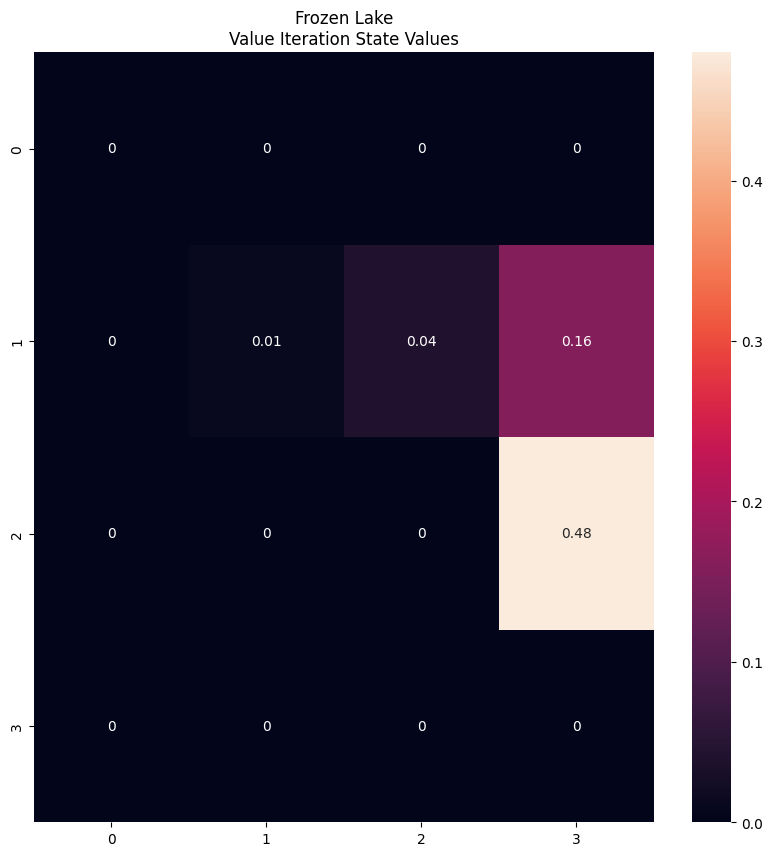

In [7]:
# run VI
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=7500, gamma=.7, theta=1e-10)


#plot state values
size=(4,4)
plt.figure(figsize=(10,10))
values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)
plt.savefig('plots/frozen_lake/VI_state_values4.png', dpi=300)

In [8]:
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
print(Counter(test_scores))
print(np.mean(test_scores))

Counter({0.0: 7556, 1.0: 2444})
0.2444


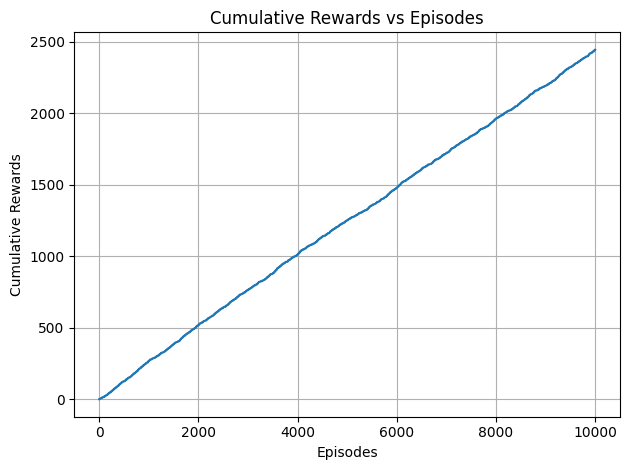

In [11]:
cumulative_sum_iter = accumulate(test_scores, operator.add)

plt.ylabel('Cumulative Rewards')
plt.xlabel('Episodes')
plt.title('Cumulative Rewards vs Episodes')
plt.plot(list(cumulative_sum_iter))
plt.grid()
plt.tight_layout()
plt.savefig('plots/frozen_lake/VI_rewards_episodes4.png', dpi=300)

## State values v. iterations

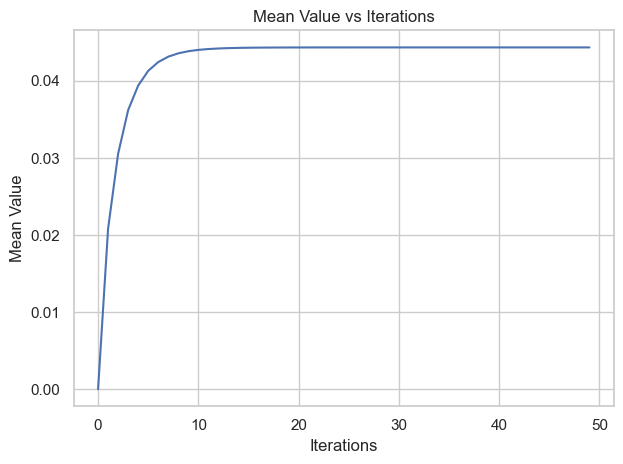

In [13]:
# Clip trailing zeros in case convergence is reached before max iterations
# This is likely when setting the n_iters parameter
max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
plt.xlabel('Iterations')
plt.ylabel('Mean Value')
plt.title("Mean Value vs Iterations")
plt.plot(max_value_per_iter)
plt.tight_layout()
plt.savefig('plots/frozen_lake/VI_opt_val_iters4.png', dpi=300)

## Gamma Changes

runtime = 0.04 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds


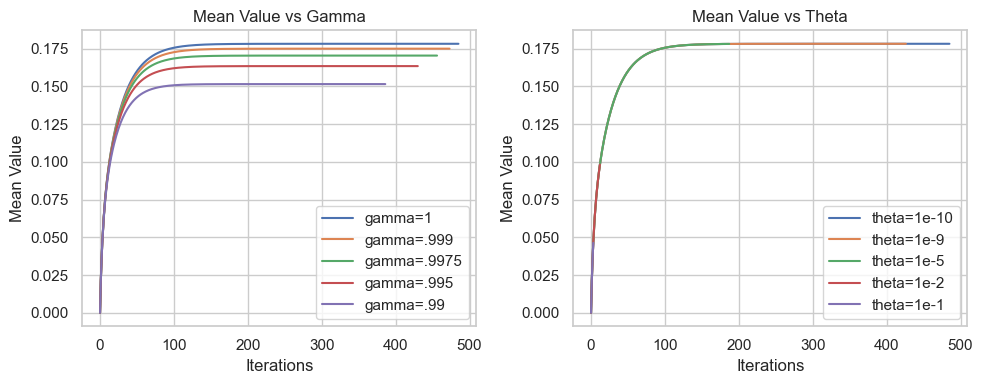

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# run VI
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000)
gamma1 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma1, label='gamma=1')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, gamma=.999)
gamma999 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma999, label='gamma=.999')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, gamma=.9975)
gamma9975 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma9975, label='gamma=.9975')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, gamma=.995)
gamma995 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma995, label='gamma=.995')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, gamma=.99)
gamma99 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma99, label='gamma=.99')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Mean Value')
ax1.set_title('Mean Value vs Gamma')
ax1.legend()

V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000)
theta10 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta10, label='theta=1e-10')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, theta=1e-9)
theta9 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta9, label='theta=1e-9')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, theta=1e-5)
theta5 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta5, label='theta=1e-5')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, theta=1e-2)
theta2 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta2, label='theta=1e-2')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, theta=1e-1)
theta1 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta1, label='theta=1e-1')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Mean Value')
ax2.set_title('Mean Value vs Theta')
ax2.legend()

plt.tight_layout()
plt.savefig('plots/frozen_lake/VI_hyperparams_mean_value4.png', dpi=300)

runtime = 0.18 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds


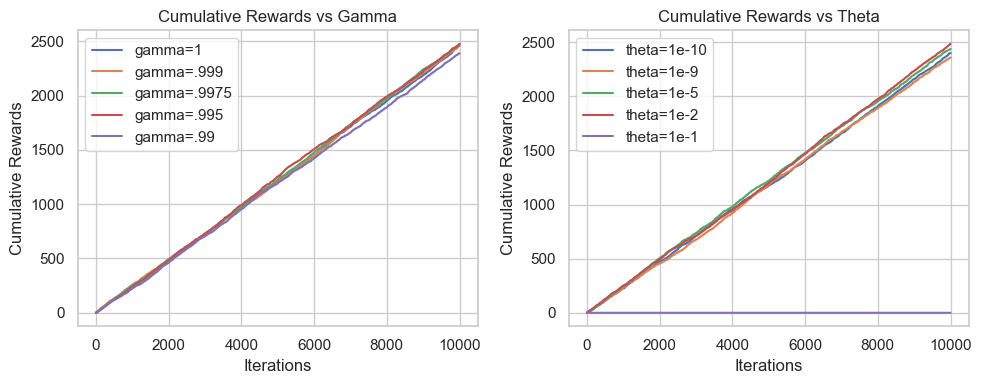

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# run VI
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma1 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma1, label='gamma=1')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, gamma=.999)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma999 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma999, label='gamma=.999')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, gamma=.9975)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma9975 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma9975, label='gamma=.9975')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, gamma=.995)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma995 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma995, label='gamma=.995')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, gamma=.99)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma99 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma99, label='gamma=.99')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cumulative Rewards')
ax1.set_title('Cumulative Rewards vs Gamma')
ax1.legend()

V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta10 = list(accumulate(test_scores, operator.add))
ax2.plot(theta10, label='theta=1e-10')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, theta=1e-9)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta9 = list(accumulate(test_scores, operator.add))
ax2.plot(theta9, label='theta=1e-9')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, theta=1e-5)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta5 = list(accumulate(test_scores, operator.add))
ax2.plot(theta5, label='theta=1e-5')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, theta=1e-2)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta2 = list(accumulate(test_scores, operator.add))
ax2.plot(theta2, label='theta=1e-2')
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=10000, theta=1e-1)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta1 = list(accumulate(test_scores, operator.add))
ax2.plot(theta1, label='theta=1e-1')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cumulative Rewards')
ax2.set_title('Cumulative Rewards vs Theta')
ax2.legend()

plt.tight_layout()
plt.savefig('plots/frozen_lake/VI_hyperparams_rewards4.png', dpi=300)

## Policy maps

runtime = 0.01 seconds


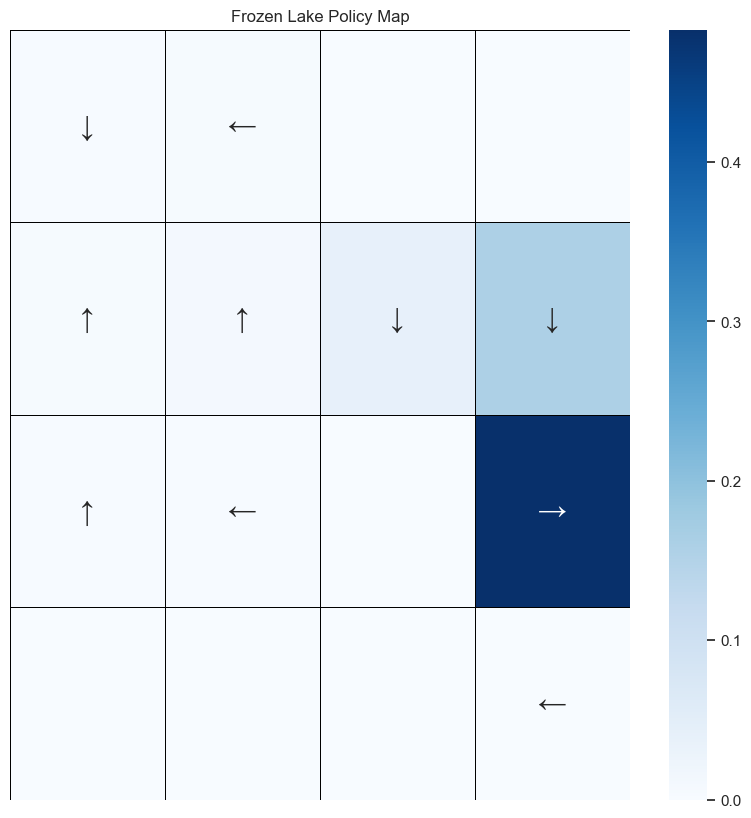

In [19]:
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=7500, gamma=.7, theta=1e-10)
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(4,4)
title="Frozen Lake Policy Map"
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)

for i in range(len(policy_map)):
    for j in range(len(policy_map[i])):
        if (i, j) in hole_coords:
            policy_map[i][j] = ''
            
plt.figure(figsize=(10,10))
plot_policy(val_max, policy_map, fl_map_size, title)
plt.savefig('plots/frozen_lake/VI_policy_map4.png', dpi=300)

# Policy Iteration

## Grid Search

In [17]:
gamma=[.7, .9, .99, 1]
n_iters = [1000, 5000, 7500, 10000]
theta=[.001, .00001, 0.0000000001]
GridSearch.pi_grid_search(frozen_lake, gamma=gamma, n_iters=n_iters, theta=theta)

running PI with gamma: 0.7  n_iters: 1000  theta: 0.001
runtime = 0.00 seconds
Avg. episode reward:  0.21
###################
running PI with gamma: 0.7  n_iters: 1000  theta: 1e-05
runtime = 0.00 seconds
Avg. episode reward:  0.26
###################
running PI with gamma: 0.7  n_iters: 1000  theta: 1e-10
runtime = 0.00 seconds
Avg. episode reward:  0.18
###################
running PI with gamma: 0.7  n_iters: 5000  theta: 0.001
runtime = 0.00 seconds
Avg. episode reward:  0.3
###################
running PI with gamma: 0.7  n_iters: 5000  theta: 1e-05
runtime = 0.00 seconds
Avg. episode reward:  0.3
###################
running PI with gamma: 0.7  n_iters: 5000  theta: 1e-10
runtime = 0.00 seconds
Avg. episode reward:  0.29
###################
running PI with gamma: 0.7  n_iters: 7500  theta: 0.001
runtime = 0.00 seconds
Avg. episode reward:  0.27
###################
running PI with gamma: 0.7  n_iters: 7500  theta: 1e-05
runtime = 0.00 seconds
Avg. episode reward:  0.23
##############

runtime = 0.02 seconds


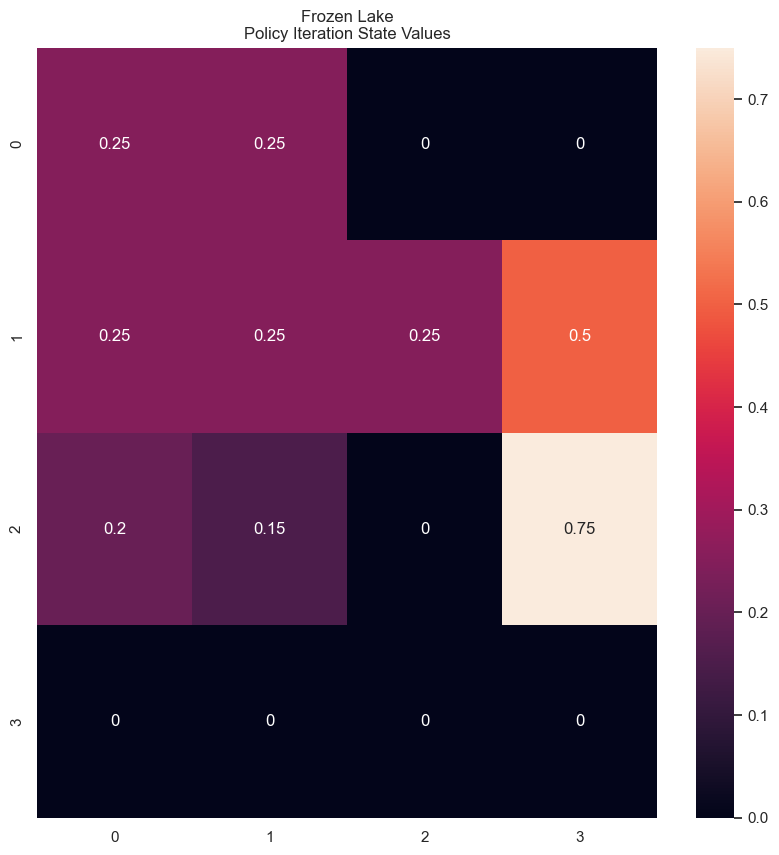

In [20]:
# run VI
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=5000, gamma=1, theta=1e-05)


#plot state values
size=(4,4)
plt.figure(figsize=(10,10))
values_heat_map(V, "Frozen Lake\nPolicy Iteration State Values", size)
plt.savefig('plots/frozen_lake/PI_state_values4.png', dpi=300)

In [21]:
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
print(Counter(test_scores))
print(np.mean(test_scores))

Counter({0.0: 7554, 1.0: 2446})
0.2446


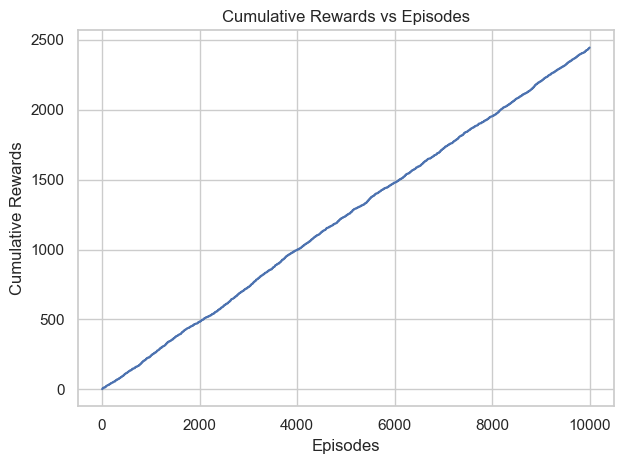

In [22]:
cumulative_sum_iter = accumulate(test_scores, operator.add)

plt.ylabel('Cumulative Rewards')
plt.xlabel('Episodes')
plt.title('Cumulative Rewards vs Episodes')
plt.plot(list(cumulative_sum_iter))
plt.tight_layout()
plt.savefig('plots/frozen_lake/PI_rewards_episodes4.png', dpi=300)

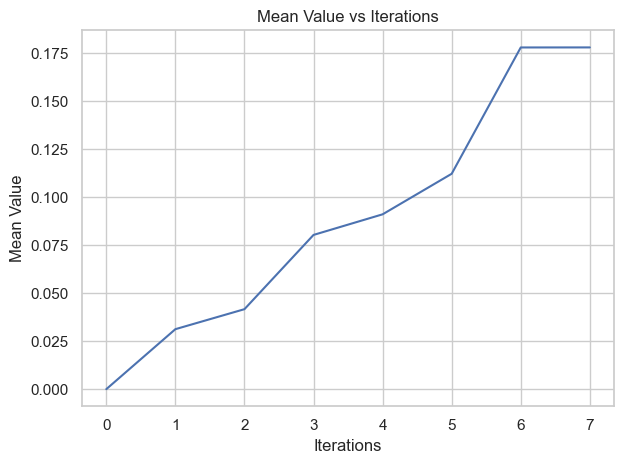

In [24]:
# Clip trailing zeros in case convergence is reached before max iterations
# This is likely when setting the n_iters parameter
max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
plt.xlabel('Iterations')
plt.ylabel('Mean Value')
plt.title("Mean Value vs Iterations")
plt.plot(max_value_per_iter)
plt.tight_layout()
plt.savefig('plots/frozen_lake/PI_opt_val_iters4.png', dpi=300)

runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds


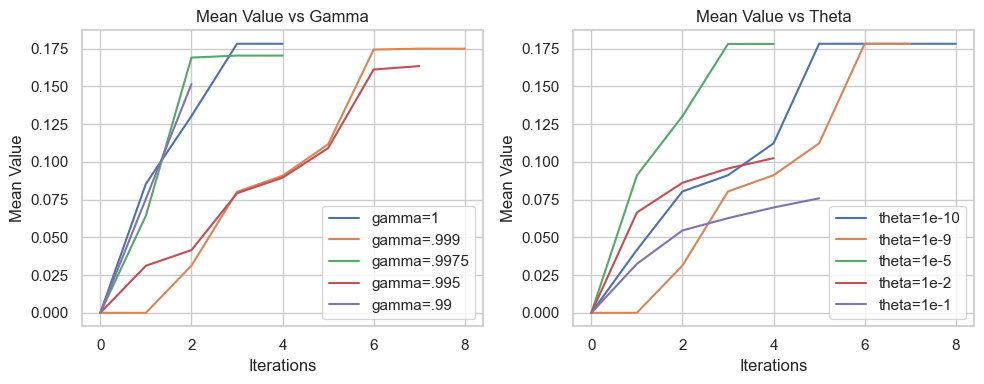

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# run VI
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000)
gamma1 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma1, label='gamma=1')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, gamma=.999)
gamma999 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma999, label='gamma=.999')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, gamma=.9975)
gamma9975 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma9975, label='gamma=.9975')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, gamma=.995)
gamma995 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma995, label='gamma=.995')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, gamma=.99)
gamma99 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma99, label='gamma=.99')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Mean Value')
ax1.set_title('Mean Value vs Gamma')
ax1.legend()

V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000)
theta10 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta10, label='theta=1e-10')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, theta=1e-9)
theta9 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta9, label='theta=1e-9')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, theta=1e-5)
theta5 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta5, label='theta=1e-5')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, theta=1e-2)
theta2 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta2, label='theta=1e-2')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, theta=1e-1)
theta1 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta1, label='theta=1e-1')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Mean Value')
ax2.set_title('Mean Value vs Theta')
ax2.legend()

plt.tight_layout()
plt.savefig('plots/frozen_lake/PI_hyperparams_mean_value4.png', dpi=300)

runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds


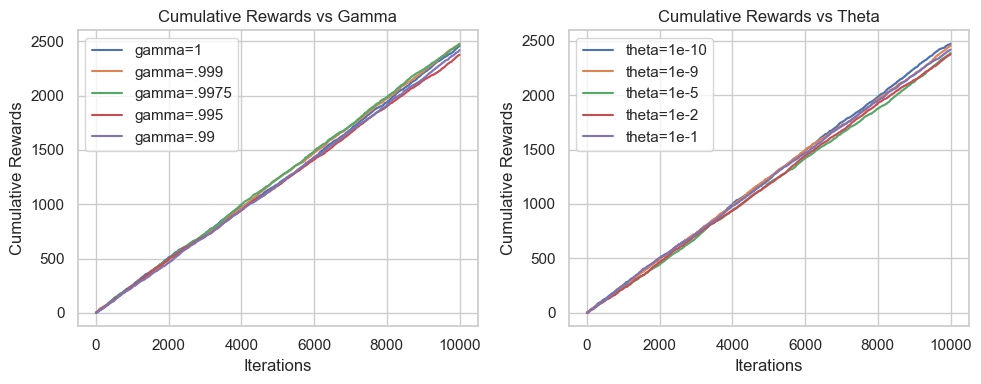

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# run VI
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma1 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma1, label='gamma=1')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, gamma=.999)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma999 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma999, label='gamma=.999')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, gamma=.9975)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma9975 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma9975, label='gamma=.9975')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, gamma=.995)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma995 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma995, label='gamma=.995')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, gamma=.99)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
gamma99 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma99, label='gamma=.99')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cumulative Rewards')
ax1.set_title('Cumulative Rewards vs Gamma')
ax1.legend()

V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta10 = list(accumulate(test_scores, operator.add))
ax2.plot(theta10, label='theta=1e-10')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, theta=1e-9)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta9 = list(accumulate(test_scores, operator.add))
ax2.plot(theta9, label='theta=1e-9')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, theta=1e-5)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta5 = list(accumulate(test_scores, operator.add))
ax2.plot(theta5, label='theta=1e-5')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, theta=1e-2)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta2 = list(accumulate(test_scores, operator.add))
ax2.plot(theta2, label='theta=1e-2')
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=10000, theta=1e-1)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)
theta1 = list(accumulate(test_scores, operator.add))
ax2.plot(theta1, label='theta=1e-1')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cumulative Rewards')
ax2.set_title('Cumulative Rewards vs Theta')
ax2.legend()

plt.tight_layout()
plt.savefig('plots/frozen_lake/PI_hyperparams_rewards4.png', dpi=300)

runtime = 0.01 seconds


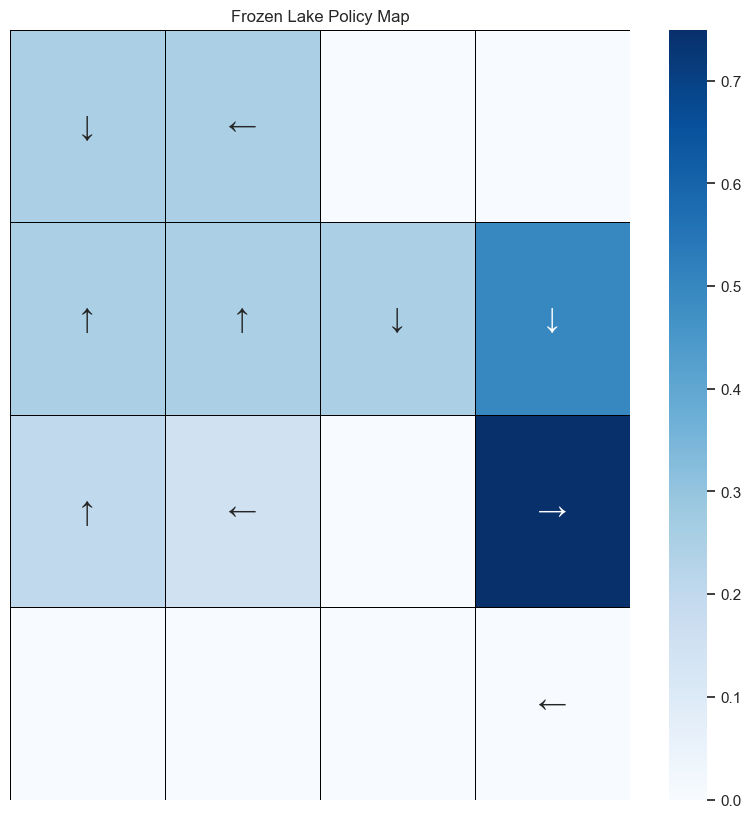

In [27]:
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=5000, gamma=1, theta=1e-05)
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(4,4)
title="Frozen Lake Policy Map"
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)

for i in range(len(policy_map)):
    for j in range(len(policy_map[i])):
        if (i, j) in hole_coords:
            policy_map[i][j] = ''

plt.figure(figsize=(10,10))
plot_policy(val_max, policy_map, fl_map_size, title)
plt.savefig('plots/frozen_lake/PI_policy_map4.png', dpi=300)

# Q-Learning

## Grid Search

In [28]:
gamma=[.25, .5, .75, .9, .99, 1]
n_iters = [10000]
epsilon_decay=[.25, .5, .75, .9, .99, 1]
GridSearch.q_learning_grid_search(frozen_lake, gamma=gamma, iters=n_iters, epsilon_decay=epsilon_decay)

running q_learning with gamma: 0.25 epsilon decay: 0.25  iterations: 10000


runtime = 0.83 seconds
Avg. episode reward:  0.01
###################
running q_learning with gamma: 0.25 epsilon decay: 0.5  iterations: 10000


runtime = 0.85 seconds
Avg. episode reward:  0.02
###################
running q_learning with gamma: 0.25 epsilon decay: 0.75  iterations: 10000


runtime = 0.90 seconds
Avg. episode reward:  0.07
###################
running q_learning with gamma: 0.25 epsilon decay: 0.9  iterations: 10000


runtime = 0.93 seconds
Avg. episode reward:  0.04
###################
running q_learning with gamma: 0.25 epsilon decay: 0.99  iterations: 10000


runtime = 0.94 seconds
Avg. episode reward:  0.05
###################
running q_learning with gamma: 0.25 epsilon decay: 1  iterations: 10000


runtime = 0.95 seconds
Avg. episode reward:  0.08
###################
running q_learning with gamma: 0.5 epsilon decay: 0.25  iterations: 10000


 55%|███████████████████▊                | 5495/10000 [00:00<00:00, 9271.50it/s]/Users/VivianNTran/anaconda3/envs/ML_A4_env/lib/python3.11/site-packages/bettermdptools/algorithms/rl.py:179: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 1.17 seconds
Avg. episode reward:  0.17
###################
running q_learning with gamma: 0.5 epsilon decay: 0.5  iterations: 10000


runtime = 1.21 seconds
Avg. episode reward:  0.05
###################
running q_learning with gamma: 0.5 epsilon decay: 0.75  iterations: 10000


runtime = 1.16 seconds
Avg. episode reward:  0.04
###################
running q_learning with gamma: 0.5 epsilon decay: 0.9  iterations: 10000


runtime = 1.09 seconds
Avg. episode reward:  0.08
###################
running q_learning with gamma: 0.5 epsilon decay: 0.99  iterations: 10000


runtime = 1.13 seconds
Avg. episode reward:  0.05
###################
running q_learning with gamma: 0.5 epsilon decay: 1  iterations: 10000


runtime = 1.00 seconds
Avg. episode reward:  0.02
###################
running q_learning with gamma: 0.75 epsilon decay: 0.25  iterations: 10000


runtime = 1.54 seconds
Avg. episode reward:  0.16
###################
running q_learning with gamma: 0.75 epsilon decay: 0.5  iterations: 10000


runtime = 1.46 seconds
Avg. episode reward:  0.21
###################
running q_learning with gamma: 0.75 epsilon decay: 0.75  iterations: 10000


runtime = 1.38 seconds
Avg. episode reward:  0.22
###################
running q_learning with gamma: 0.75 epsilon decay: 0.9  iterations: 10000


runtime = 1.40 seconds
Avg. episode reward:  0.14
###################
running q_learning with gamma: 0.75 epsilon decay: 0.99  iterations: 10000


runtime = 1.36 seconds
Avg. episode reward:  0.15
###################
running q_learning with gamma: 0.75 epsilon decay: 1  iterations: 10000


runtime = 1.47 seconds
Avg. episode reward:  0.23
###################
running q_learning with gamma: 0.9 epsilon decay: 0.25  iterations: 10000


runtime = 1.74 seconds
Avg. episode reward:  0.23
###################
running q_learning with gamma: 0.9 epsilon decay: 0.5  iterations: 10000


runtime = 1.67 seconds
Avg. episode reward:  0.18
###################
running q_learning with gamma: 0.9 epsilon decay: 0.75  iterations: 10000


runtime = 1.74 seconds
Avg. episode reward:  0.23
###################
running q_learning with gamma: 0.9 epsilon decay: 0.9  iterations: 10000


runtime = 1.70 seconds
Avg. episode reward:  0.19
###################
running q_learning with gamma: 0.9 epsilon decay: 0.99  iterations: 10000


runtime = 1.69 seconds
Avg. episode reward:  0.31
###################
running q_learning with gamma: 0.9 epsilon decay: 1  iterations: 10000


runtime = 1.63 seconds
Avg. episode reward:  0.14
###################
running q_learning with gamma: 0.99 epsilon decay: 0.25  iterations: 10000


runtime = 2.02 seconds
Avg. episode reward:  0.24
###################
running q_learning with gamma: 0.99 epsilon decay: 0.5  iterations: 10000


runtime = 1.95 seconds
Avg. episode reward:  0.22
###################
running q_learning with gamma: 0.99 epsilon decay: 0.75  iterations: 10000


runtime = 1.87 seconds
Avg. episode reward:  0.21
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 10000


runtime = 1.95 seconds
Avg. episode reward:  0.33
###################
running q_learning with gamma: 0.99 epsilon decay: 0.99  iterations: 10000


runtime = 1.81 seconds
Avg. episode reward:  0.24
###################
running q_learning with gamma: 0.99 epsilon decay: 1  iterations: 10000


runtime = 1.80 seconds
Avg. episode reward:  0.19
###################
running q_learning with gamma: 1 epsilon decay: 0.25  iterations: 10000


runtime = 2.18 seconds
Avg. episode reward:  0.25
###################
running q_learning with gamma: 1 epsilon decay: 0.5  iterations: 10000


runtime = 2.09 seconds
Avg. episode reward:  0.22
###################
running q_learning with gamma: 1 epsilon decay: 0.75  iterations: 10000


runtime = 2.01 seconds
Avg. episode reward:  0.24
###################
running q_learning with gamma: 1 epsilon decay: 0.9  iterations: 10000


runtime = 2.02 seconds
Avg. episode reward:  0.31
###################
running q_learning with gamma: 1 epsilon decay: 0.99  iterations: 10000


runtime = 1.93 seconds
Avg. episode reward:  0.23
###################
running q_learning with gamma: 1 epsilon decay: 1  iterations: 10000


runtime = 1.90 seconds
Avg. episode reward:  0.28
###################


  0%|                                                 | 0/10000 [00:00<?, ?it/s]/Users/VivianNTran/anaconda3/envs/ML_A4_env/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
 28%|██████████                          | 2804/10000 [00:00<00:00, 7544.10it/s]/Users/VivianNTran/anaconda3/envs/ML_A4_env/lib/python3.11/site-packages/bettermdptools/algorithms/rl.py:179: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 1.83 seconds


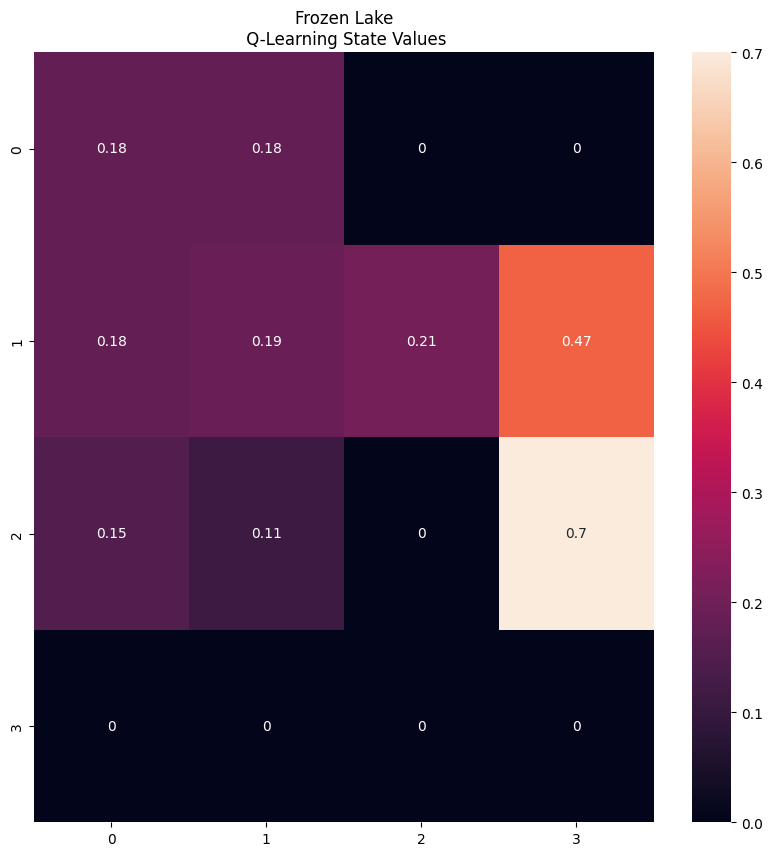

In [9]:
# run Q-Learning
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, gamma=.99, epsilon_decay_ratio=.99)


#plot state values
size=(4,4)
plt.figure(figsize=(10,10))
values_heat_map(V, "Frozen Lake\n Q-Learning State Values", size)
plt.savefig('plots/frozen_lake/QLearning_state_values4.png', dpi=300)

In [30]:
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=10000, render=False, pi=pi, user_input=False)

In [31]:
print(Counter(test_scores))
print(np.mean(test_scores))

Counter({0.0: 7481, 1.0: 2519})
0.2519


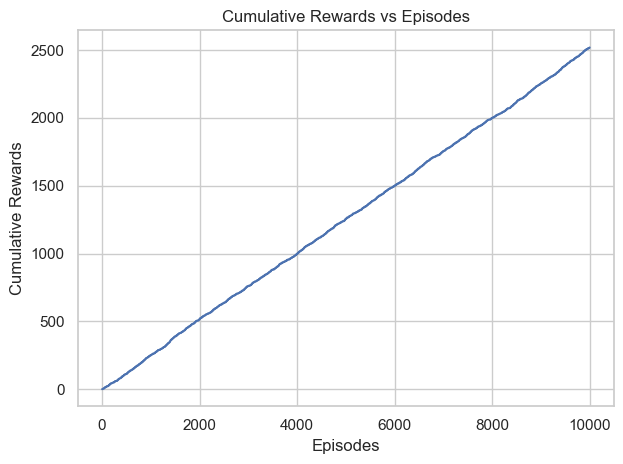

In [32]:
cumulative_sum_iter = accumulate(test_scores, operator.add)

plt.ylabel('Cumulative Rewards')
plt.xlabel('Episodes')
plt.title('Cumulative Rewards vs Episodes')
plt.plot(list(cumulative_sum_iter))
plt.tight_layout()
plt.savefig('plots/frozen_lake/QLearning_rewards_episodes4.png', dpi=300)

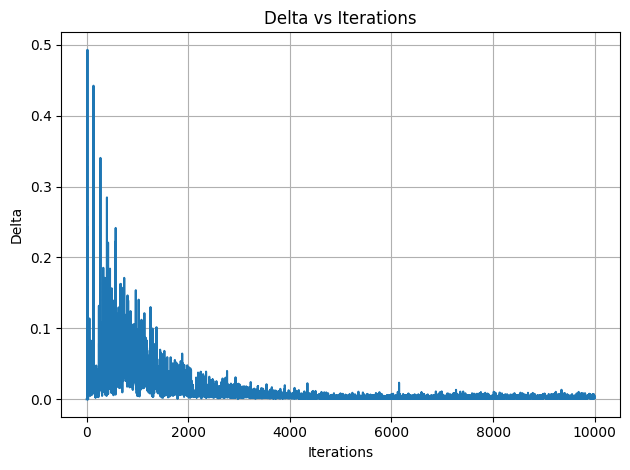

In [11]:
# Clip trailing zeros in case convergence is reached before max iterations
# This is likely when setting the n_iters parameter
delta_values = [np.max(np.abs(Q_track[i] - Q_track[i-1])) for i in range(1, len(Q_track))]
plt.xlabel('Iterations')
plt.ylabel('Delta')
plt.title("Delta vs Iterations")
plt.plot(delta_values)
plt.grid()
plt.tight_layout()
plt.savefig('plots/frozen_lake/QLearning_delta4.png', dpi=300)

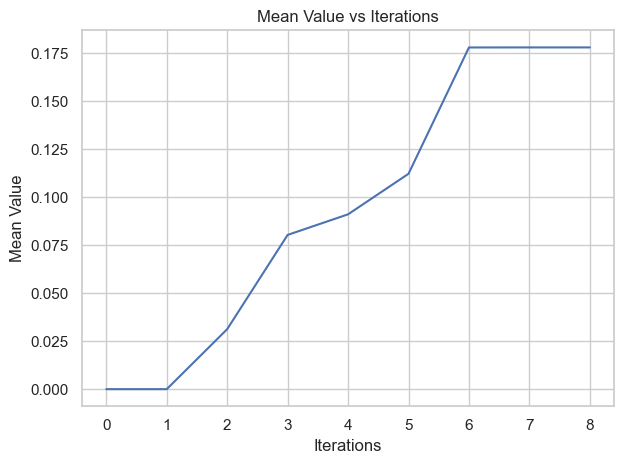

In [33]:
# Clip trailing zeros in case convergence is reached before max iterations
# This is likely when setting the n_iters parameter
max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
plt.xlabel('Iterations')
plt.ylabel('Mean Value')
plt.title("Mean Value vs Iterations")
plt.plot(max_value_per_iter)
plt.tight_layout()
plt.savefig('plots/frozen_lake/QLearning_opt_val_iters4.png', dpi=300)

 33%|███████████▉                        | 3299/10000 [00:00<00:00, 6835.19it/s]/Users/VivianNTran/anaconda3/envs/ML_A4_env/lib/python3.11/site-packages/bettermdptools/algorithms/rl.py:179: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 1.86 seconds


runtime = 1.92 seconds


runtime = 1.82 seconds


runtime = 1.83 seconds


runtime = 1.82 seconds


runtime = 1.79 seconds


runtime = 1.87 seconds


runtime = 1.93 seconds


runtime = 2.20 seconds


runtime = 2.07 seconds


runtime = 1.78 seconds


runtime = 1.86 seconds


runtime = 1.98 seconds


runtime = 2.00 seconds


runtime = 1.37 seconds


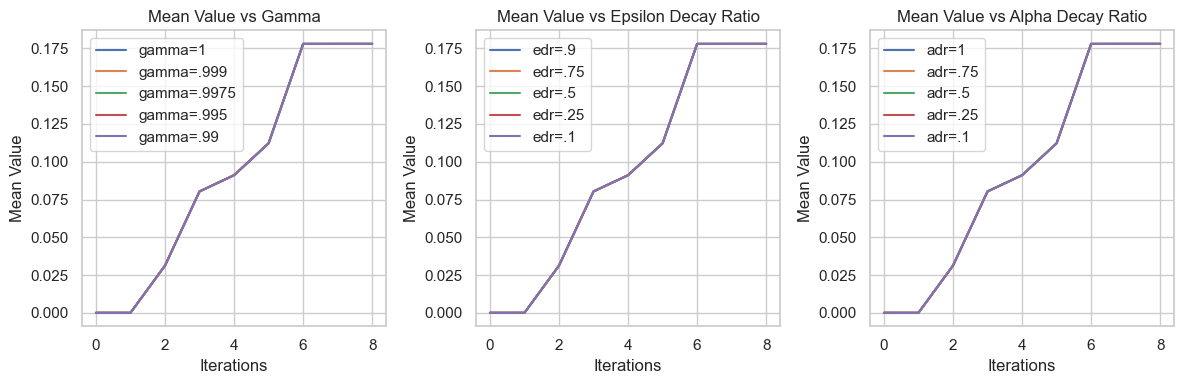

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
# run VI
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000)
gamma1 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma1, label='gamma=1')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, gamma=.999)
gamma999 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma999, label='gamma=.999')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, gamma=.9975)
gamma9975 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma9975, label='gamma=.9975')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, gamma=.995)
gamma995 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma995, label='gamma=.995')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, gamma=.99)
gamma99 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma99, label='gamma=.99')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Mean Value')
ax1.set_title('Mean Value vs Gamma')
ax1.legend()

Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000)
theta10 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta10, label='edr=.9')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.75)
theta9 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta9, label='edr=.75')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.5)
theta5 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta5, label='edr=.5')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.25)
theta2 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta2, label='edr=.25')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.1)
theta1 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta1, label='edr=.1')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Mean Value')
ax2.set_title('Mean Value vs Epsilon Decay Ratio')
ax2.legend()

Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, alpha_decay_ratio=1)
theta10 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax3.plot(theta10, label='adr=1')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.75)
theta9 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax3.plot(theta9, label='adr=.75')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.5)
theta5 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax3.plot(theta5, label='adr=.5')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.25)
theta2 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax3.plot(theta2, label='adr=.25')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.1)
theta1 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax3.plot(theta1, label='adr=.1')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Mean Value')
ax3.set_title('Mean Value vs Alpha Decay Ratio')
ax3.legend()

plt.tight_layout()
plt.savefig('plots/frozen_lake/QLearning_hyperparams_mean_value4.png', dpi=300)

runtime = 1.83 seconds


runtime = 1.87 seconds


runtime = 1.87 seconds


runtime = 1.84 seconds


runtime = 1.90 seconds


runtime = 1.86 seconds


runtime = 1.89 seconds


runtime = 2.14 seconds


runtime = 1.54 seconds


runtime = 1.54 seconds


runtime = 1.83 seconds


runtime = 1.85 seconds


runtime = 2.03 seconds


runtime = 2.09 seconds


runtime = 1.25 seconds


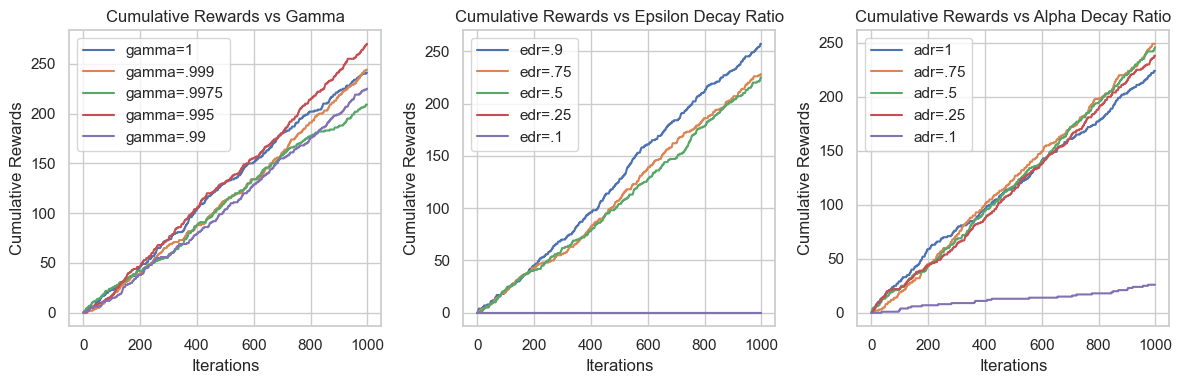

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
# run VI
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=1000, render=False, pi=pi, user_input=False)
gamma1 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma1, label='gamma=1')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, gamma=.999)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=1000, render=False, pi=pi, user_input=False)
gamma999 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma999, label='gamma=.999')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, gamma=.9975)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=1000, render=False, pi=pi, user_input=False)
gamma9975 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma9975, label='gamma=.9975')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, gamma=.995)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=1000, render=False, pi=pi, user_input=False)
gamma995 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma995, label='gamma=.995')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, gamma=.99)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=1000, render=False, pi=pi, user_input=False)
gamma99 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma99, label='gamma=.99')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cumulative Rewards')
ax1.set_title('Cumulative Rewards vs Gamma')
ax1.legend()

Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=1000, render=False, pi=pi, user_input=False)
theta10 = list(accumulate(test_scores, operator.add))
ax2.plot(theta10, label='edr=.9')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.75)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=1000, render=False, pi=pi, user_input=False)
theta9 = list(accumulate(test_scores, operator.add))
ax2.plot(theta9, label='edr=.75')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.5)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=1000, render=False, pi=pi, user_input=False)
theta5 = list(accumulate(test_scores, operator.add))
ax2.plot(theta5, label='edr=.5')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.25)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=1000, render=False, pi=pi, user_input=False)
theta2 = list(accumulate(test_scores, operator.add))
ax2.plot(theta2, label='edr=.25')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.1)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=1000, render=False, pi=pi, user_input=False)
theta1 = list(accumulate(test_scores, operator.add))
ax2.plot(theta1, label='edr=.1')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cumulative Rewards')
ax2.set_title('Cumulative Rewards vs Epsilon Decay Ratio')
ax2.legend()

Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, alpha_decay_ratio=1)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=1000, render=False, pi=pi, user_input=False)
theta10 = list(accumulate(test_scores, operator.add))
ax3.plot(theta10, label='adr=1')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.75)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=1000, render=False, pi=pi, user_input=False)
theta9 = list(accumulate(test_scores, operator.add))
ax3.plot(theta9, label='adr=.75')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.5)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=1000, render=False, pi=pi, user_input=False)
theta5 = list(accumulate(test_scores, operator.add))
ax3.plot(theta5, label='adr=.5')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.25)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=1000, render=False, pi=pi, user_input=False)
theta2 = list(accumulate(test_scores, operator.add))
ax3.plot(theta2, label='adr=.25')
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, epsilon_decay_ratio=.1)
test_scores = TestEnv.test_env(env=frozen_lake, n_iters=1000, render=False, pi=pi, user_input=False)
theta1 = list(accumulate(test_scores, operator.add))
ax3.plot(theta1, label='adr=.1')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Cumulative Rewards')
ax3.set_title('Cumulative Rewards vs Alpha Decay Ratio')
ax3.legend()

plt.tight_layout()
plt.savefig('plots/frozen_lake/QLearning_hyperparams_rewards4.png', dpi=300)

runtime = 1.79 seconds


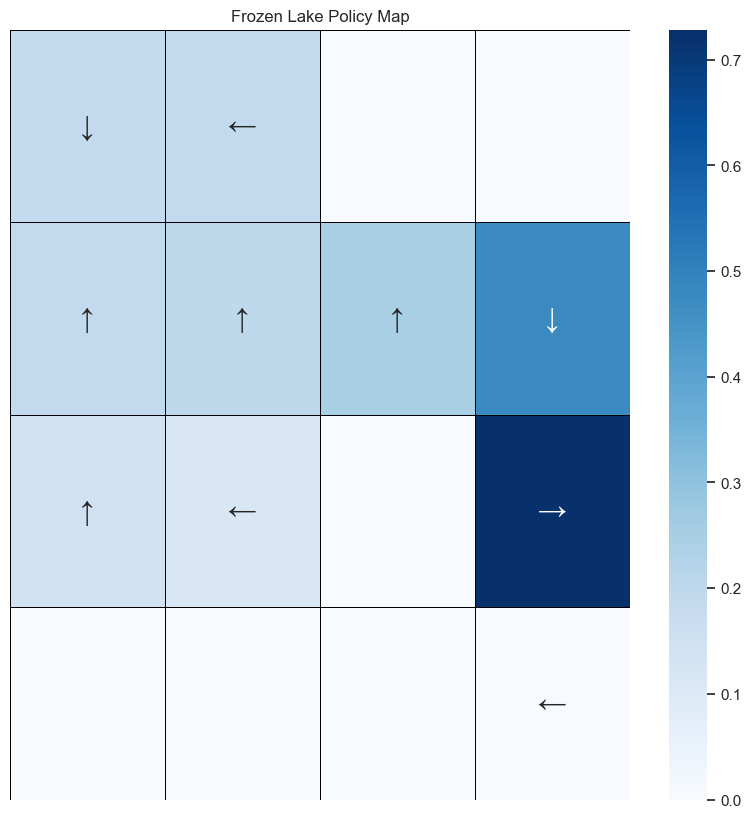

In [39]:
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=10000, gamma=.99, epsilon_decay_ratio=.99)
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(4,4)
title="Frozen Lake Policy Map"
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)

for i in range(len(policy_map)):
    for j in range(len(policy_map[i])):
        if (i, j) in hole_coords:
            policy_map[i][j] = ''

plt.figure(figsize=(10,10))
plot_policy(val_max, policy_map, fl_map_size, title)
plt.savefig('plots/frozen_lake/QLearning_policy_map4.png', dpi=300)